In [160]:
import urllib.request
url = "https://en.wikipedia.org/wiki/Hawaii"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, 'lxml')
#print(soup.prettify())

In [161]:
#finding and displaying all tables
all_sortable_tables = soup.find_all('table', class_='wikitable sortable')
c = 0
#for table in all_sortable_tables:
    #print(f"\n\nNEW TABLE[{c}]\n\n", table)
    #c += 1

In [164]:
#getting the right table I want to use
my_table = all_sortable_tables[1]
#my_table

In [165]:
#Gathering table data into lists
A=[]
B=[]
C=[]

for row in my_table.findAll('tr'):
    td=row.findAll('td')
    th=row.findAll('th')
    if len(td) == 2 and len(th) == 1:
        A.append(td[0].find(text=True))
        B.append(th[0].find(text=True))
        #C.append(td[1].find(text=True)) #Not needed for plotting

In [166]:
#Putting lists into DataFrame
import pandas as pd
df=pd.DataFrame(A, columns=['Ancestry'])
df['Percentage']=B
df['Percentage']= df['Percentage'].str.replace('\n', '') #Ensures no '\n'
df['Percentage']= df['Percentage'].str.replace('%', '') #Ensures no '%'
df['Percentage'] = df['Percentage'].astype(float) #Converts to float
#df['Main Article']=C not needed for plotting
df

,Ancestry,Percentage
0,Filipino,13.6
1,Japanese,12.6
2,Polynesian,9.0
3,Germans,7.4
4,Irish,5.2
5,English,4.6
6,Portuguese,4.3
7,Chinese,4.1
8,Korean,3.1
9,Mexican,2.9


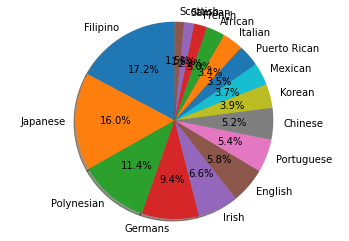

In [154]:
#Plotting Data as PieChart
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(df['Percentage'], labels=A, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

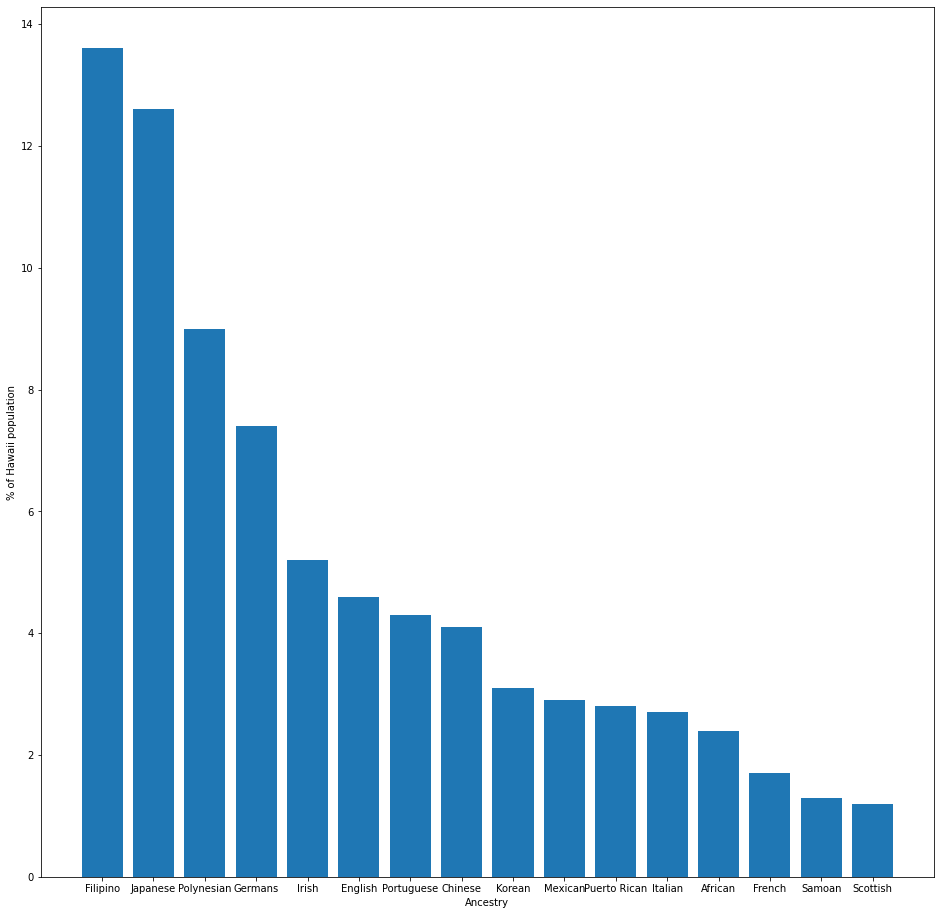

In [159]:
#Plotting Data as Bar Graph
plt.figure(figsize=(len(df['Ancestry']),len(df['Percentage'])))
plt.bar(range(0,len(df['Ancestry'])), df['Percentage'])
plt.xticks(range(len(df['Ancestry'])), df['Ancestry'])
plt.ylabel("% of Hawaii population")
plt.xlabel("Ancestry")
plt.show()